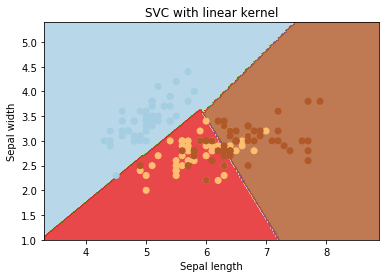

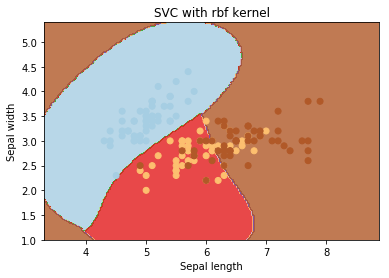

In [6]:
#WEEK4 HW1;Multiclass SVM_신혜연
####신혜연

### Support Vector Machine(SVM)
####linear SVM kernel
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
######import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
######avoid this ugly slicing by using a two-dim dataset
y = iris.target
######we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)
######create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()


######Use SVM rbf kernel
######Change the kernel type to rbf in below line and look at the impact.
svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
######새로만든 svc를 토대로 create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

In [ ]:
##### 위 아래 그림을 비교해보면 linear와 다르게 곡선을 지니고 영역이 나뉘어진 것을 확인할 수 있다!

In [7]:
#WEEK4 HW2; Weighted SVM_신혜연

######svm with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
######generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
######define model
model = SVC(gamma='scale', class_weight='balanced')
######define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
######evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
######summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.971
